# Titanic - Machine Learning Algorithms 

In this notebook, we will compare the performance of various machine learning models to our feature engineered data set from last session.

The link to the slides can be found at the following address:
https://docs.google.com/presentation/d/1VMIWnFhUe5XzwZfDCoZrdzpucOdfAedOcrbrBZCNW6k/edit#slide=id.g428d17ec60_0_0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb

/anaconda3/envs/data_science_club/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Load Data Frames from last session
read_path = "feature_engineered_datasets/"
train_fe = pd.read_csv(read_path+"train_fe.csv")
valid_fe = pd.read_csv(read_path+"valid_fe.csv")
test_fe = pd.read_csv(read_path+"test_fe.csv")

## Random Forests

We will start by fitting the sklearn implementation of Random Forest, the documantation can be found here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html. 

The two important hyperparameters we will look at  are: 

n_estimators: # Of trees

max_features: max # of feature in a given tree


In [3]:

p = train_fe.shape[1]-1
rf = RandomForestClassifier(n_estimators=20,max_features=round(p**.5)) 
rf.fit(train_fe.drop("Survived",axis=1),train_fe["Survived"])
rf.score(valid_fe.drop("Survived",axis=1),valid_fe["Survived"])


0.8213058419243986

## Let's implement Bagging using the Random Forest function.

What do we need to change in Random to make it bagging?

0.8075601374570447

Which model performs better? Why?

How can we make their performance similar? 

How can we improve the performance of both models?

# Gradient Boosting Machines

There are many GBM packages available, we will use XGBoost.

There are many hyperparameters in the XGBoost model. We will look at a few:

learning_rate - controls complexity of the model, smaller = more complex

n_estimators - number of trees, bigger = more complex

colsample_bytree - same as max_features from RF

max_depth - maximum depth of each tree, bigger = more complex

We will use the sklearn API of XGB since it is simpler. 

For more options use the original XGB API which can be found here: https://xgboost.readthedocs.io/en/latest/python/python_api.html

In [5]:
bst = xgb.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators = 30,colsample_bytree=.8,importance="gain")
bst.fit(train_fe.drop("Survived",axis=1),train_fe["Survived"])
bst.score(valid_fe.drop("Survived",axis=1),valid_fe["Survived"])

/anaconda3/envs/data_science_club/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8350515463917526

# Understanding your model

In [6]:

col_names = train_fe.drop("Survived",axis=1).columns
rf_importance = pd.Series(rf.feature_importances_,index=col_names).sort_values(ascending=False)
xgb_importance = pd.Series(bst.feature_importances_,index=col_names).sort_values(ascending=False)



In [7]:
%matplotlib inline
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

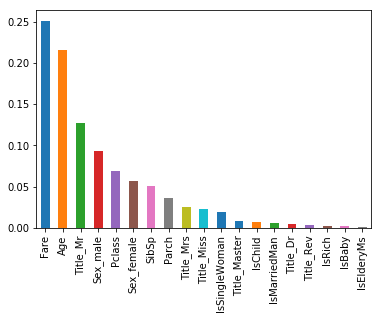

In [10]:
rf_importance.plot(kind="bar")

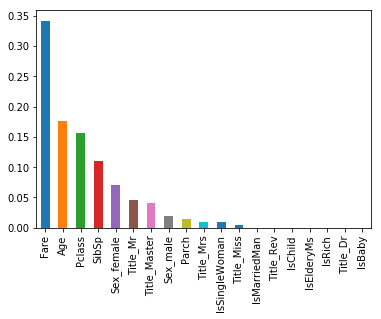

In [11]:
xgb_importance.plot(kind="bar")

Do these features intuitively make sense?

Do we have leaky variables? Are we overfitting anywhere?


### Improve your model

Create more features

Using cross-validation optimization techiques to find better hyperparameters http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Blend various models?

In [46]:
test_pred =  pd.Series(bst.predict(test_fe.drop("Survived",axis=1)).astype("int"))

test_id = pd.read_csv("titanic_test.csv",usecols=["PassengerId"])
model = bst # your final model goes here
submission = pd.concat([test_id,test_pred],axis=1)
submission.columns = ["PassengerId","Survived"]
submission.to_csv("kaggle_submission_1.csv",index=False) # This got 0.78468 on Leaderboard


/anaconda3/envs/data_science_club/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Try and beat my best score: 0.79425